In [1]:
#libraries
import spectral as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Pigment kwarguments
# Band size
x=356/600

# Main absorption peaks of photosynthetic pigments from Literature
PE1 = 95*x
PE2 = 171*x
Chla = 278*x
kwargs = {'linestyle':':'}

# Open and preliminary inspection of dataset

In [32]:
#open files
hdr = r"C:\Users\jcmontes\ONEDRI~1\01_PRO~1\IMAGIN~1\PHENOT~1\data\Kestrel\210624~1\LITHOO~3\capture\LITHOO~1.HDR"
binn = r"C:\Users\jcmontes\ONEDRI~1\01_PRO~1\IMAGIN~1\PHENOT~1\data\Kestrel\210624~1\LITHOO~3\capture\LITHOO~1.RAW"

#load file into memory
img = sp.envi.open(hdr,binn)
print(img)

	Data Source:   'C:\Users\jcmontes\ONEDRI~1\01_PRO~1\IMAGIN~1\PHENOT~1\data\Kestrel\210624~1\LITHOO~3\capture\LITHOO~1.RAW'
	# Rows:            320
	# Samples:        2048
	# Bands:           356
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16


C:\Users\jcmontes\Miniconda3\lib\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


ImageView object:
  Display bands       :  (80, 150, 300)
  Interpolation       :  <default>
  RGB data limits     :
    R: [314.0, 1643.0]
    G: [317.0, 3350.0]
    B: [314.0, 1675.0]

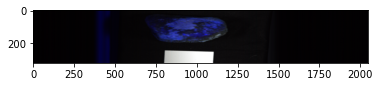

In [37]:
sp.imshow(img,(80,150,300),stretch = 0.01)

## Inspect dataset metadata

In [5]:
md = img.metadata
#for i in md: print(i)
print('First 3 Band Center Wavelengths:',img.bands.centers[:3])
print('Last 3 Band Center Wavelengths:',img.bands.centers[-3:])
print('Number of bands:', len(md['wavelength']))

First 3 Band Center Wavelengths: [394.36, 396.05, 397.73]
Last 3 Band Center Wavelengths: [998.57, 1000.26, 1001.96]
Number of bands: 356


# Visualize dataset as a color composite

ImageView object:
  Display bands       :  (80, 150, 300)
  Interpolation       :  <default>
  RGB data limits     :
    R: [314.0, 1643.0]
    G: [317.0, 3350.0]
    B: [314.0, 1675.0]

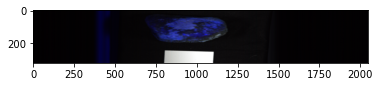

In [6]:
# Select r, g, b bands
sp.imshow(img,(80,150,300),stretch = 0.01)

ImageView object:
  Display bands       :  (300, 100, 50)
  Interpolation       :  <default>
  RGB data limits     :
    R: [1298.0, 1680.0]
    G: [1551.0, 1984.0]
    B: [745.0, 914.0]

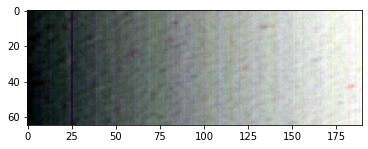

In [27]:
#Resample image to sub region interest
crop = img[255:500,810:1000,:]
sp.imshow(crop,(300,100,50), stretch = 0.01)
#plt.savefig('ohyes.png')

In [ ]:
def rad_ratio(spectral_array, bands, rad_array):
    if spectral_array.ndim == 3:
        # unfold data cube 3D to 2D
        unfold_spec = spectral_array.reshape(-1, len(bands))
    else:
        unfold_spec = spectral_array

    norm_spec = np.divide(unfold_spec.T, rad_array).T

    if spectral_array.ndim == 3:
        norm_spec = np.reshape(norm_spec, (len(spectral_array[:, 1, 1]), len(spectral_array[1, :, 1]), len(bands)))
        return norm_spec
    else:
        return norm_spec

# K-Means clustering

spectral:INFO: k-means iteration 1 - 10101 pixels reassigned.
spectral:INFO: k-means iteration 2 - 2137 pixels reassigned.
spectral:INFO: k-means iteration 3 - 547 pixels reassigned.
spectral:INFO: k-means iteration 4 - 122 pixels reassigned.
spectral:INFO: k-means iteration 5 - 64 pixels reassigned.
spectral:INFO: k-means iteration 6 - 53 pixels reassigned.
spectral:INFO: k-means iteration 7 - 37 pixels reassigned.
spectral:INFO: k-means iteration 8 - 25 pixels reassigned.
spectral:INFO: k-means iteration 9 - 19 pixels reassigned.
spectral:INFO: k-means iteration 10 - 12 pixels reassigned.
spectral:INFO: kmeans terminated with 3 clusters after 10 iterations.


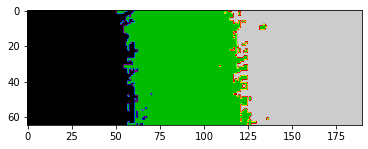

In [28]:
(m,c) = sp.kmeans(crop,3,10)
plt.imshow(m,cmap = 'nipy_spectral')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


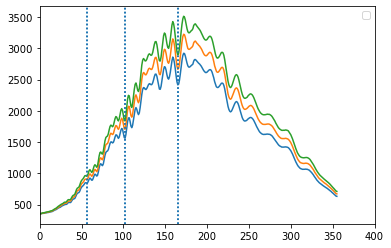

In [29]:
for i in range(c.shape[0]):
    plt.plot(c[i,:])
    plt.axvline(PE1,**kwargs)
    plt.axvline(PE2,**kwargs)
    plt.axvline(Chla,**kwargs)
    plt.xlim(0,400)
plt.legend()

### View overlay of clusters

<bound method ImageView.show_data of ImageView object:
  Display bands       :  [0, 178.0, 355]
  Interpolation       :  <default>
  RGB data limits     :
    R: [282.0, 367.0]
    G: [2553.0, 3369.0]
    B: [610.0, 736.0]
>

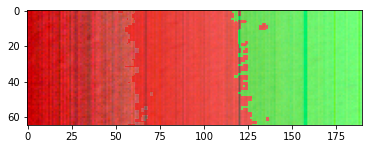

In [30]:
view = sp.imshow(crop,stretch=0.01, classes = m)
view.set_display_mode('overlay')
view.class_alpha = 0.5 #transparency
view.show_data

In [16]:
cmap = plt.cm.get_cmap('Spectral')

rgba = cmap(0.5)
print(rgba) # (0.99807766255210428, 0.99923106502084169, 0.74602077638401709, 1.0)

(0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0)


## Principal Component Analysis

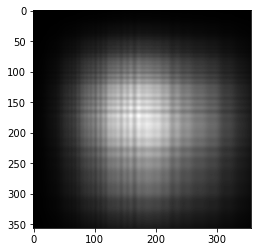

In [25]:
pc = sp.principal_components(crop)
pc_view = sp.imshow(pc.cov)
xdata = pc.transform(crop)

In [26]:
pcdata = pc.reduce(num=10).transform(crop)

In [27]:
pc_0999 = pc.reduce(fraction=0.999)

# How many eigenvalues are left?
print(len(pc_0999.eigenvalues))

3


(270, 270, 3)


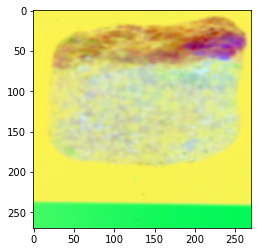

In [28]:
img_pc = pc_0999.transform(crop)
print(img_pc.shape)

v = sp.imshow(img_pc[:,:,:5], stretch_all=True)

In [ ]:
#not same tutorial

In [29]:
pc = sp.principal_components(crop)

In [30]:
xdata = pc.transform(crop)

In [31]:
w = sp.view_nd(xdata[:,:,:15], classes=m)

C:\Users\jcmontes\Miniconda3\lib\site-packages\spectral\graphics\graphics.py:757: UserWarning: 
There is no current wx.App object - creating one now.
  warnings.warn('\nThere is no current wx.App object - creating one now.',


# Maximum Noise Fraction

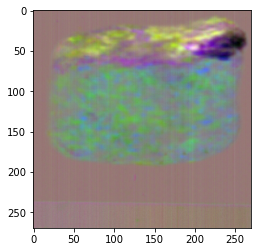

In [24]:
# Read more about MnF
signal = sp.calc_stats(crop,allow_nan=True)
noise = sp.noise_from_diffs(crop)
mnfr = sp.mnf(signal, noise)
reduced = mnfr.reduce(crop,num=5)
v=sp.imshow(reduced[:,:,2:])

In [ ]:
# Not really sure how this helps, so its another kmeans from the mnfr. Maybe you can try as well the PCA. 
# But again, not sure why you are doing it.

(m,c)=sp.kmeans(imagen_ql,nclusters = 10,max_iterations = 30)
plt.imshow(m,cmap = 'nipy_spectral')
plt.legend()

(7, 356)


NameError: name 'bb' is not defined

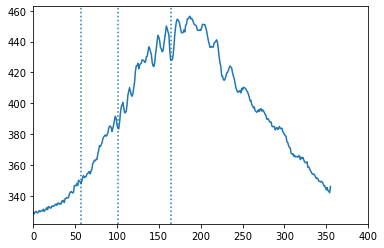

In [22]:
#Work in progress
#Assign spectral bands as X labels
#Spectral profile of clusters

print(c.shape)
fig,ax = plt.subplots()
for i in range(c.shape[0]):
    plt.plot(c[i,:])
    plt.xlim(0,400)
    plt.axvline(PE1,**kwargs)
    plt.axvline(PE2,**kwargs)
    plt.axvline(Chla,**kwargs)
    ticks, labels = plt.xticks()
    fig.canvas.draw()
    ax.set_xticklabels(bb[1], rotation = 'vertical')